In [1]:
import sys, os
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pydub
import torch
import foundation as fd
import foundation.util as util

In [5]:
audio_files = util.crawl('/home/fleeb/workspace/ml_datasets/audio/archive_samples_only/raw/batch0/', lambda x: '.mp3' in x)
len(audio_files)

246

In [6]:
audio_files[:5]

['/home/fleeb/workspace/ml_datasets/audio/archive_samples_only/raw/batch0/02_The_American_sample.mp3',
 '/home/fleeb/workspace/ml_datasets/audio/archive_samples_only/raw/batch0/06_Wooden_horse_sample.mp3',
 '/home/fleeb/workspace/ml_datasets/audio/archive_samples_only/raw/batch0/08_Albinoni__T._Adagio_in_G_minor_sample.mp3',
 '/home/fleeb/workspace/ml_datasets/audio/archive_samples_only/raw/batch0/01_Street_Fighting_Years_sample.mp3',
 '/home/fleeb/workspace/ml_datasets/audio/archive_samples_only/raw/batch0/01_Twins_theme_sample.mp3']

In [53]:
s = pydub.AudioSegment.from_file(audio_files[0])
print('length: {:.4f} min'.format(len(s) / 60 / 1000))

length: 0.5000 min


In [54]:
s.dBFS

-19.358427169998716

In [8]:
len(s.raw_data) / s.frame_rate / s.channels / s.sample_width # 16bit

30.0

In [9]:
s.channels

2

In [11]:
s.sample_width

2

In [55]:
x = pydub.effects.normalize(s)

In [56]:
y = pydub.effects.normalize(x)

In [57]:
s.rms, x.rms, y.rms

(3528, 3487, 3487)

In [58]:
s.dBFS, x.dBFS, y.dBFS

(-19.358427169998716, -19.459959751674827, -19.459959751674827)

In [25]:
left, right = s.split_to_mono()

In [26]:
left.rms

3761

In [27]:
x = pydub.effects.normalize(left)
x.rms

3718

In [59]:
a = np.frombuffer(x.raw_data, dtype=np.int16) / 2**15
a.dtype, a.shape

(dtype('float64'), (2646000,))

In [60]:
a.mean()

5.261387324026833e-06

In [29]:
begin, end = np.where(a != 0)[0][[0, -1]]

<IPython.core.display.Javascript object>


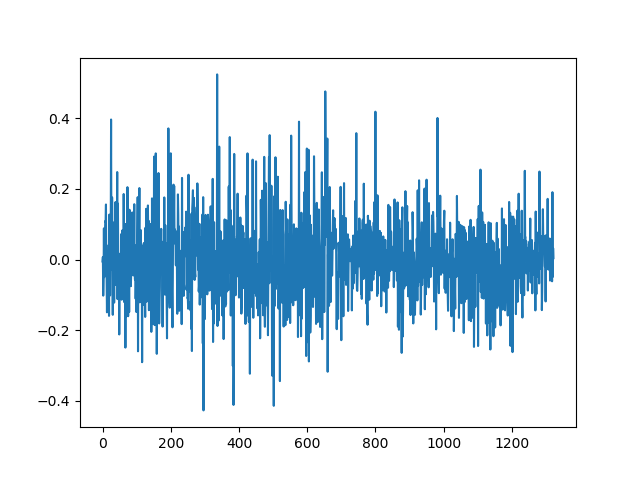

In [30]:
plt.figure()
plt.plot(a[::1000])

In [31]:
spec = np.fft.fft(a)
spec = np.abs(spec)
spec = spec[:len(spec)//2]
fs = right.frame_rate
w = np.arange(len(spec)) * fs / len(spec) / 2

In [32]:
fs / len(spec)

0.06666666666666667

In [33]:
x = w[w<5000]
y = spec[w<5000]

<IPython.core.display.Javascript object>


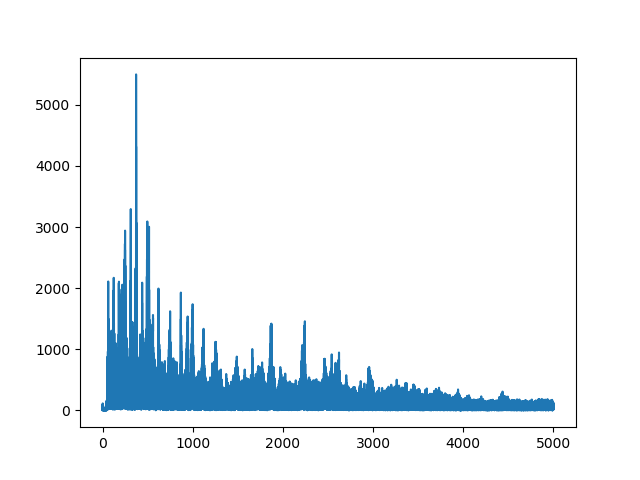

In [34]:
plt.figure()
plt.plot(x, y)

In [37]:
t = torch.tensor(a)
t.size()

torch.Size([1323000])

In [44]:
44.1e3 / 20

2205.0

In [45]:
torch.stft?

In [52]:
spec = torch.stft(t, 3000, win_length=44100//20, hop_length=44100//100).pow(2).sum(-1).sqrt()
spec.size()

torch.Size([1501, 3001])

<IPython.core.display.Javascript object>


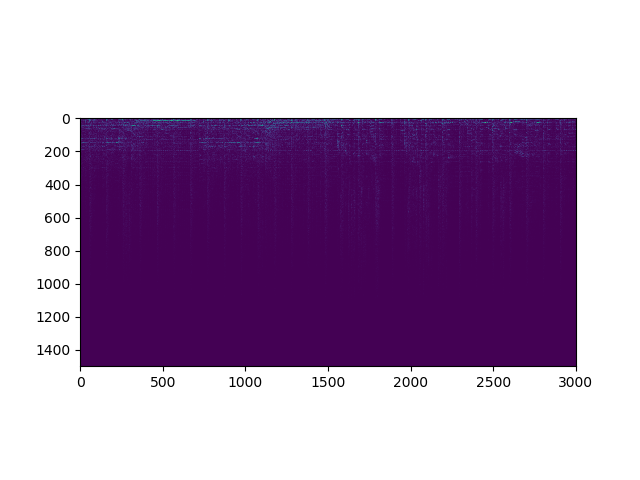

In [50]:
plt.figure()
plt.imshow(spec.numpy())